# Source of inspiration

Many sources about that, pointing all to https://course.fast.ai/

This is version 5 of this course.

# Lesson 1 - Getting started

https://course.fast.ai/Lessons/lesson1.html

## Deep learning introduction

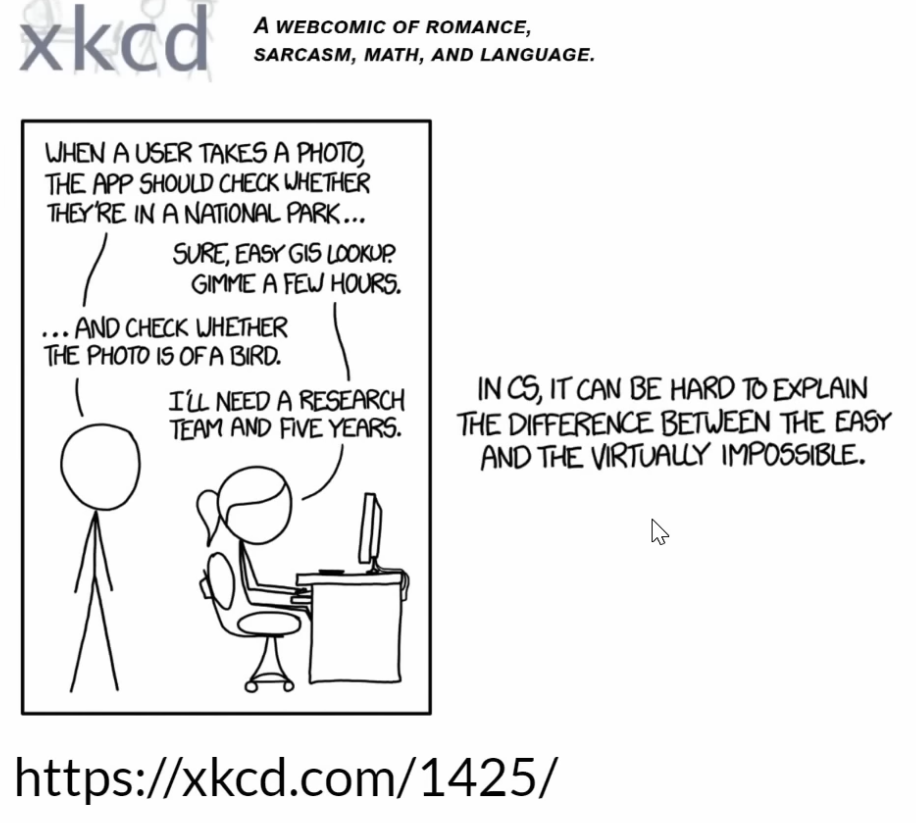

In 2015, nearly impossible to recognize a bird with CS. And Jeremy doing that in 2 minutes ;)

## Recent progress

After this brief demonstration, Jeremy shared what he remmbers about recent progress in AI such as:

- artworks: Dall-e, midjourney to create images from text

- explaining jokes: Google Pathways Language Model (PaLM) to explain jokes or run mathematical proof

## Self learning of features

Then classical but nice explanation that NN learns features (features are not given or coded) and illustrates that with Matt Zeiler and Rob Fergus works

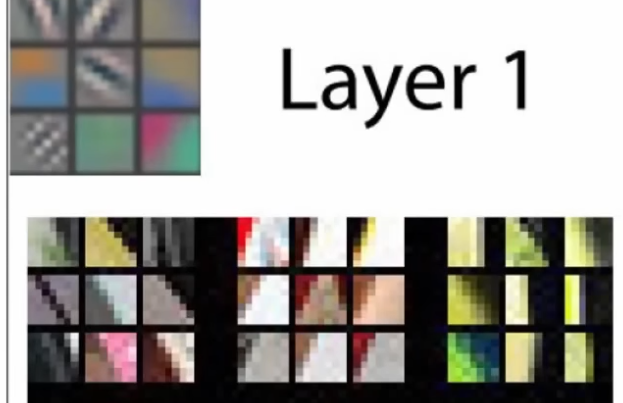

## Vision can be used in many different ways

And it is of course used to classify images, but all these techniques can be combined out of this field for example:

- recognize sound by transforming sound waves into pictures ([Ethan Sutin](https://forums.fast.ai/t/share-your-work-here/27676/40))

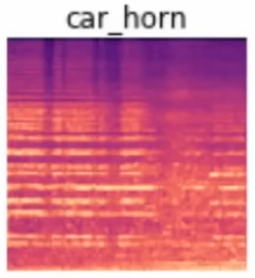

- turn timeseries into pictures ([Ignacio Oguiza](https://forums.fast.ai/t/time-series-sequential-data-study-group/29686))

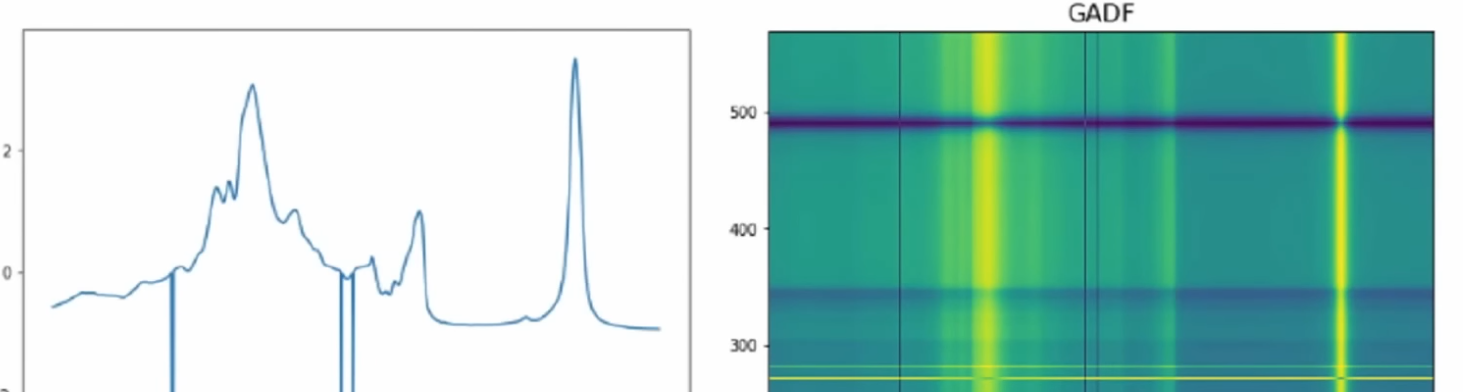


- pictures from mouse movements ([Gleb Esman](https://forums.fast.ai/t/new-blog-post-user-classification-by-mouse-movements/2595))

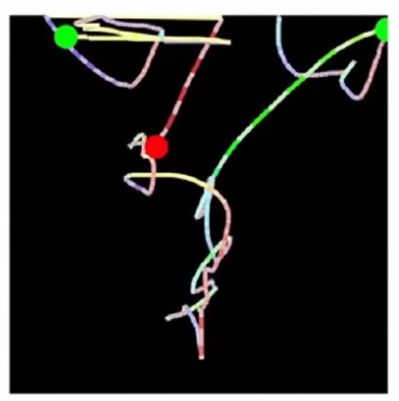

## Tools - pytorch, jupyter notebooks, kaggle

For this course Jeremy suggests to use the kaggle cloud server.

If using someone else notebook, just upvote and click `Copy & Edit`

https://www.kaggle.com/code/guillaumeramelet/jupyter-notebook-101/edit



And now some hands-on starting with `Is it a bird?` [notebook](https://www.kaggle.com/code/guillaumeramelet/is-it-a-bird-creating-a-model-from-your-own-data/edit).

And aside note: Jeremy is running all the presentation through Jupyter notebook and [RISE](https://rise.readthedocs.io/en/stable/)


It's a good idea to ensure you're running the latest version of any libraries you need.

`!pip install -Uqq libraries` upgrades to the latest version of libraries (fastai for example)



## Going through this "is it a bird?" notebook

Jeremy shares best practices and steps

Such as viewing your data between each steps

Jeremy uses a lot of functional programming it is why we see things like [map](https://www.geeksforgeeks.org/python-map-function/) used a lot.

### DataBlock

Using Datablocks API

> To train a model, we'll need DataLoaders, which is an object that contains a training set (the images used to create a model) and a validation set (the images used to check the accuracy of a model -- not used during training). In fastai we can create that easily using a DataBlock, and view sample images from it:

And Jeremy explains the logic between the 5 arguments needed to create a DataBlock:

* blocks: tupple with type of inputs and output

* get_items: to get all data, here it points to a function to get list of image fileS

* splitter: method to split between training set and validation set

* get_y: to kown labels, here it is a function

* item_tfms: which transformation to apply

And from a DataBlock you create dataloaders (dls) provding (path for images; and bs (batch size))

### learners

This is a key part.

Learners are taking 3 arguments: dataloaders, model, metric

And vision models can be from [timm](https://timm.fast.ai/). 

Here we train a pre-trained model, which is called fine_tune and we do it on 3 epochs.

### predict

Just providing an item to `lean.predict` will return `label`, `tensor value`, `probability`

And it is why we have such outputs

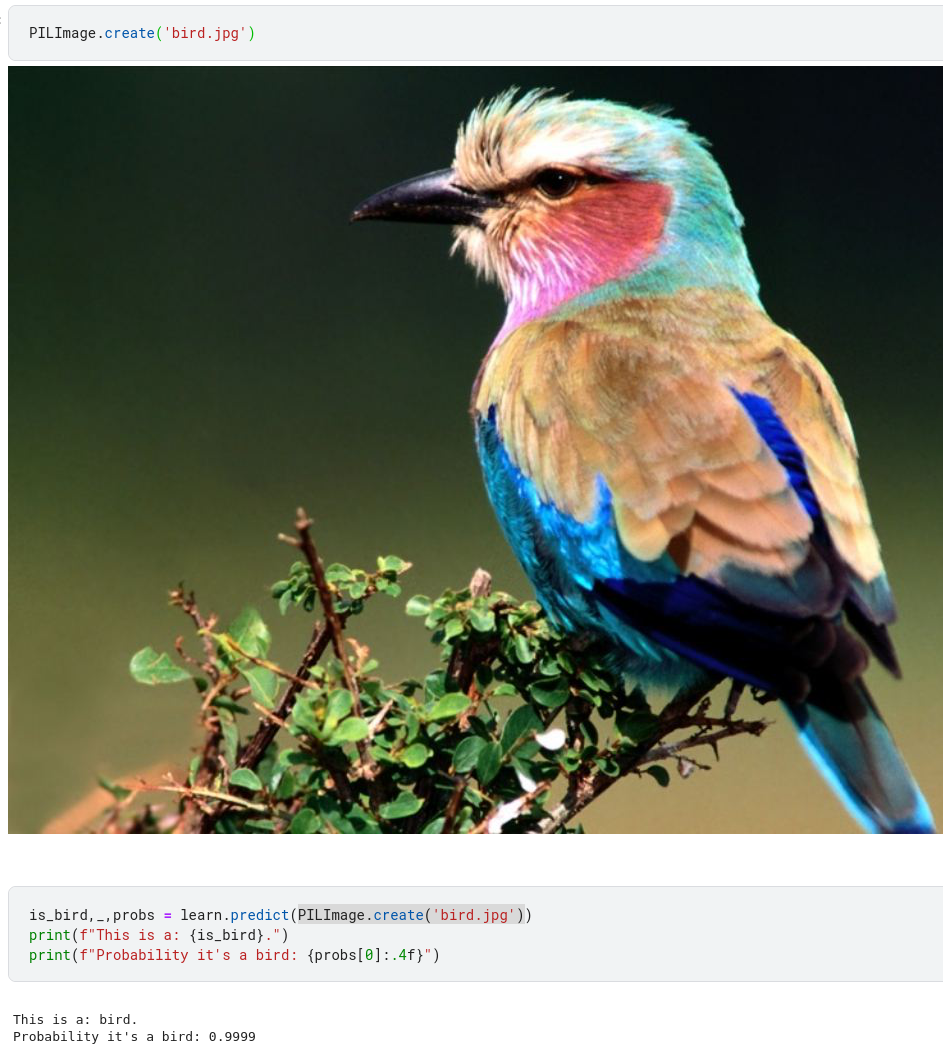

## and beyond image recognition

### Segmentation

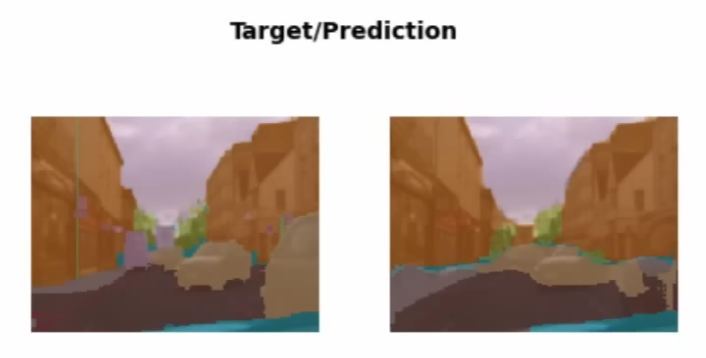

And here we don't have datablock but direclty dataloaders

### Tabular analysis

Here again no need for DataBlock but a direct use of `TabularDataLoaders`

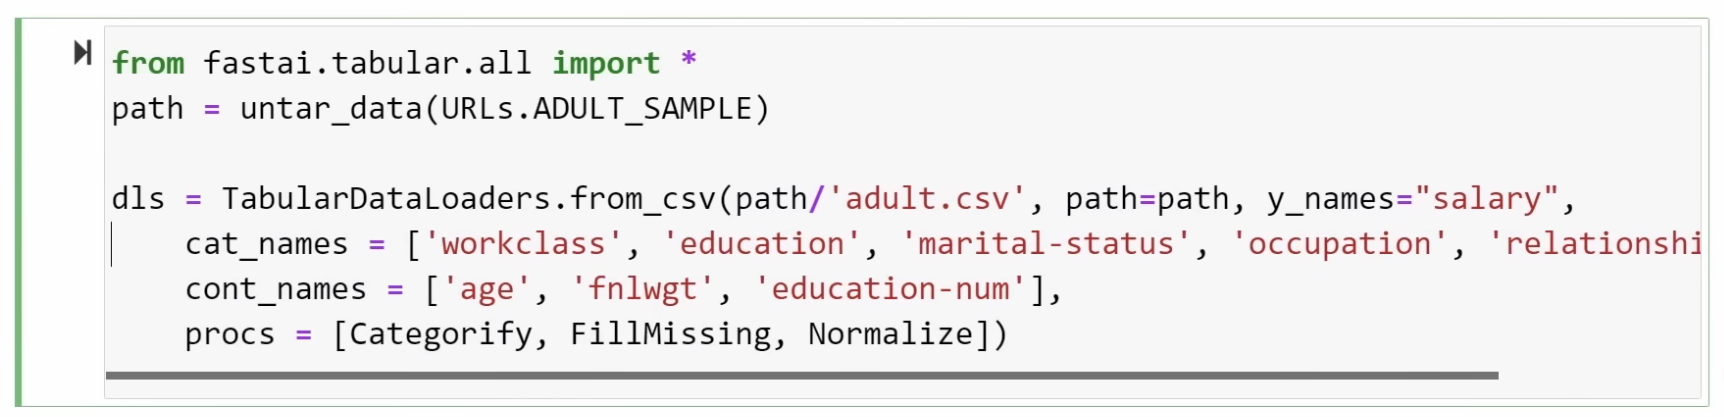

And the `tabular_learner` wich takes dls and metric.

### Collaborative filtering (recommandation system)

# Lesson 2 - Deployment

https://course.fast.ai/Lessons/lesson2.html

In this lesson we will use gradio + huggingface spaces.

Jeremy starts by training a vision classifier and use this 1st model to clean labels using `ImageClassifierCleaner` 


This is not specific to vision.

## Gradio + HuggingFace Spaces

### create HF repo

Create this [minima](https://huggingface.co/spaces/Guillaume63/minima) space from HF.

Aside the explanation on HF, Jeremy shares how useful [Github Desktop](https://github.com/shiftkey/desktop/releases) is.

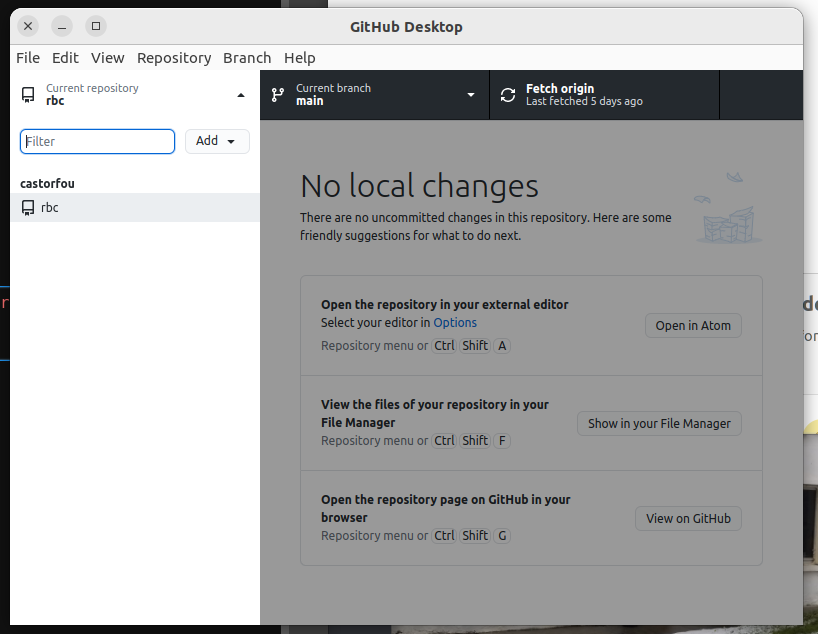

### create 1st gradio app and host it

Create app.py as instructed in our freshly created HF space. Commit Push (using github desktop). Back to HF interface, something is being built. and voila

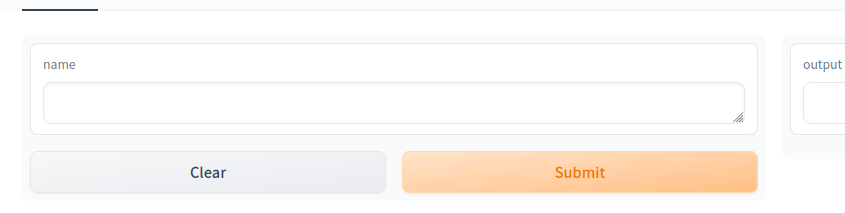

Nothing new because I played with [gradio and HF](/posts/2022-10-12-gradio_huggingface.html) couple of weeks ago.

We know have a basic app hosted. We can just integrate a deep learning model.

### train and export a DL model

And for that Jeremy has setup [something on kaggle](https://www.kaggle.com/code/guillaumeramelet/saving-a-basic-fastai-model/edit)

They key (and new) part here is

```python
learn.export('model.pkl')
```

Finally, open the Kaggle sidebar on the right if it's not already, and find the section marked "Output". Open the /kaggle/working folder, and you'll see model.pkl. Click on it, then click on the menu on the right that appears, and choose "Download". After a few seconds, your model will be downloaded to your computer, where you can then create your app that uses the model.

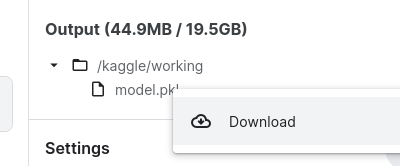

And copy/past it to your local minima repo. Push it to HF.

### integrate it with gradio

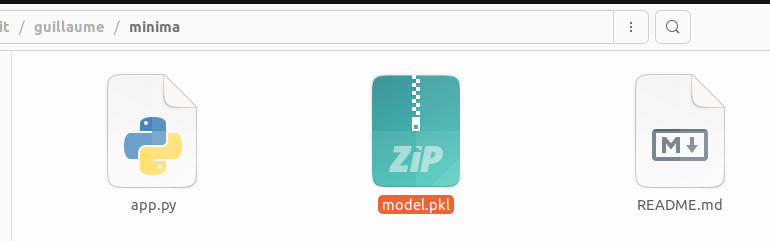

And Jeremy illustrates how to do it with a notebook and nbdev. Exactly as I did in [gradio and huggingface - handson](/posts/2022-10-12-gradio_huggingface.html)

#### load model

Main parts are to load the model with 

```python
learn = load_learner('model.pkl')
```

#### run prediction
to run a prediction with

```python
pred, idx, probs = learn.predict(img)
```

#### call prediction through a function
and to create the `classify_image` function as expected by gradio

```python
categories = ('Dog', 'Cat')

def classify_image(img):
    pred, idx, probs = learn.predict(img)
    return dict(zip(categories, map(float, probs))))
```

and this return part is quite complex because gradio cannot deal with Tensors.


#### create gradio UI
There is now the gradio interface that takes image and returns dictionary.

```python
image = gr.inputs.Image(shape=(192, 192))
label = gr.outputs.Label()
examples = ['dog.jpg', 'cat.jpg', 'dunno.jpg']

intf = gr.Interface(fn=classify_image, inputs=image, outputs=label, examples=examples)
intf.launch(inline=False)
```

#### export as app.py

And export as app.py and for that Jeremy uses a slightly different version that I used

Mine;
```python
import nbdev; nbdev.export.nb_export('app.ipynb', lib_path='.')
```

His:
```python
from nbdev.export import notebook2script
notebook2script('app.ipynb')
```

https://huggingface.co/spaces/jph00/testing

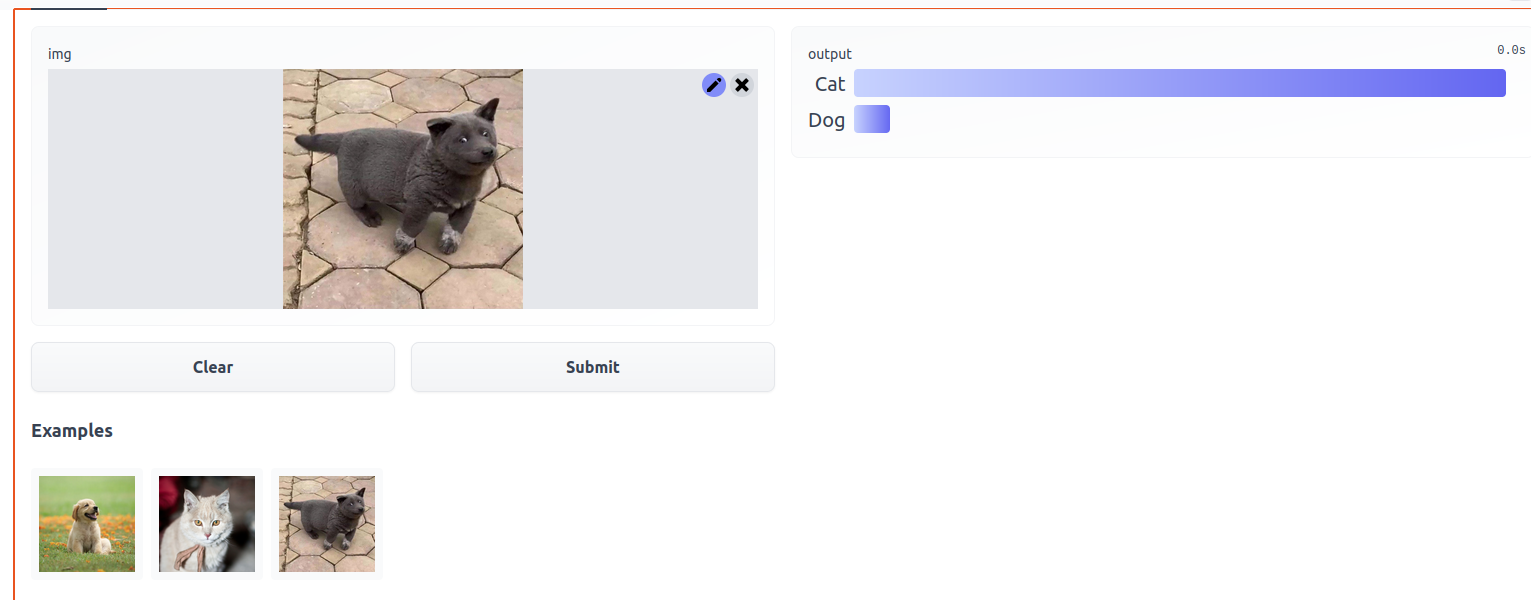

## fastsetup

https://github.com/fastai/fastsetup

clone it with github desktop (will do cmd line I don't have the option Jeremy has)

launch `./setup-conda.sh` that will install mamba. I won't do it because I already have it installed.

I have an env for fastai `conda activate fastai`

and install fastai with `conda install -c fastchan fastai` as mentionned in https://docs.fast.ai. I use conda but it points to mamba in my PC.

then nbdev `conda install -c fastchan nbdev`

I run these commands with `conda update -c fastchan  fastai` to be sure to get the last versions